## **Deep Learning for Image Classification**

**Import Libraries**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

**Load Dataset**

In [ ]:
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


**Preprocessing**

In [ ]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

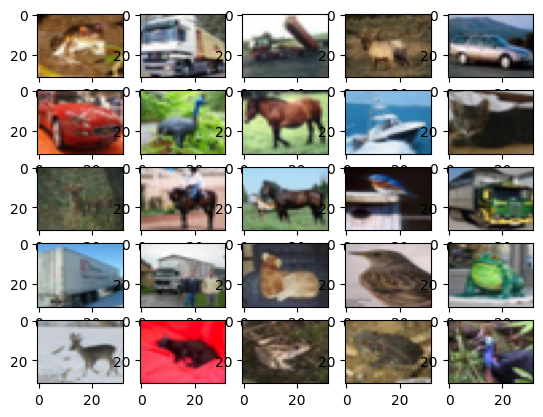

In [ ]:
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1

plt.show()

**Basic Model**


**Defining the model**

In [ ]:
# Define the sequential model
model = tf.keras.Sequential([
    # Flattening the input
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),  # Input Layer

    # Hidden layer with 256 units and ReLU activation
    tf.keras.layers.Dense(256, activation='relu'),  # First Hidden Layer

    # Hidden layer with 128 units and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),  # Second Hidden Layer

    # Hidden layer with 64 units and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),  # Third Hidden Layer

    # Output layer with 10 units for class probabilities
    tf.keras.layers.Dense(10, activation='softmax')  # Output Layer
])

**Compile the model**

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________


**Training the model**

In [ ]:
%%time
# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)

Epoch 1/25
1563/1563 [==============================] - 20s 12ms/step - loss: 1.8774 - accuracy: 0.3145 - val_loss: 1.7261 - val_accuracy: 0.3746
Epoch 2/25
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6883 - accuracy: 0.3922 - val_loss: 1.6121 - val_accuracy: 0.4307
Epoch 3/25
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6064 - accuracy: 0.4236 - val_loss: 1.5758 - val_accuracy: 0.4396
Epoch 4/25
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5541 - accuracy: 0.4443 - val_loss: 1.5451 - val_accuracy: 0.4445
Epoch 5/25
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5202 - accuracy: 0.4547 - val_loss: 1.5225 - val_accuracy: 0.4585
Epoch 6/25
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4893 - accuracy: 0.4658 - val_loss: 1.5197 - val_accuracy: 0.4623
Epoch 7/25
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4629 - accuracy: 0.4752 - val_loss: 1.4742 -

**Evaluate the model**

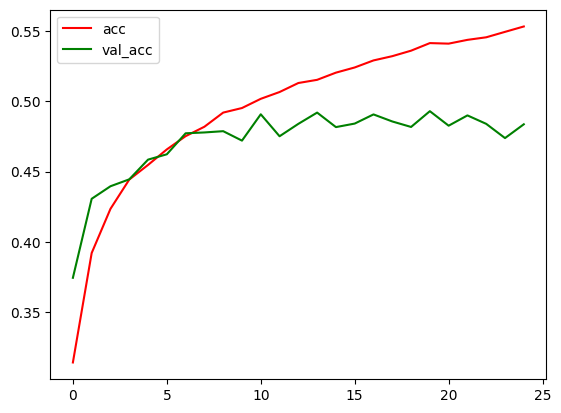

In [ ]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc', color='red')
plt.plot(history.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 1.4833 - accuracy: 0.4836
Test loss: 1.4833234548568726
Test accuracy: 0.483599990606308


**CNN Based Architecture**

**Defining the Model**

In [ ]:
# Define the number of classes
K = len(set(y_train))
print("Number of classes:", K)

# Build the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))

# Hidden layers
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(K, activation='softmax'))

# Model summary
model.summary()

Number of classes: 10
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                

**Compile the model**

In [ ]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Define Callbacks**

In [ ]:
# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)

**Train the model**

In [ ]:
t

In [ ]:
%%time
# Fit
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=50,
  callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1563/1563 [==============================] - 549s 349ms/step - loss: 1.3034 - accuracy: 0.5517 - val_loss: 1.1268 - val_accuracy: 0.6199 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 575s 368ms/step - loss: 0.8367 - accuracy: 0.7094 - val_loss: 0.7927 - val_accuracy: 0.7268 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 550s 352ms/step - loss: 0.6847 - accuracy: 0.7657 - val_loss: 0.8580 - val_accuracy: 0.7123 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 569s 364ms/step - loss: 0.5763 - accuracy: 0.8033 - val_loss: 0.7023 - val_accuracy: 0.7678 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 577s 369ms/step - loss: 0.4886 - accuracy: 0.8325 - val_loss: 0.6611 - val_accuracy: 0.7880 - lr: 0.0010
Epoch 6/50
1563/1563 [==============================] - 571s 365ms/step - loss: 0.4156 - accuracy: 0.8552 - val_loss: 0.6824 - val_accuracy: 0.7990 - lr: 0.0010
Epoch 7/50
1563/1563 [============

**Evaluating the model**

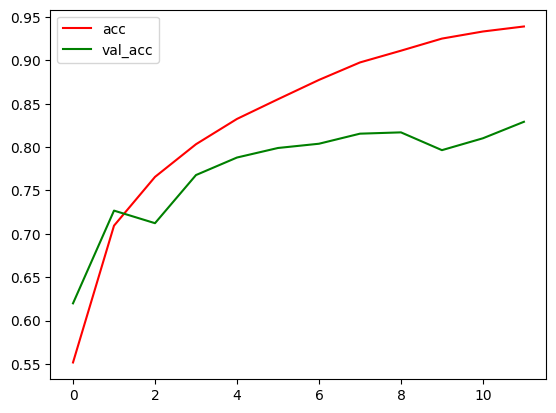

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 25s 78ms/step - loss: 0.6287 - accuracy: 0.8039
Test loss: 0.6287112236022949
Test accuracy: 0.8039000034332275


**Checking the final model with the some examples**

1/1 [==============================] - 0s 309ms/step
Original label is automobile and predicted label is automobile


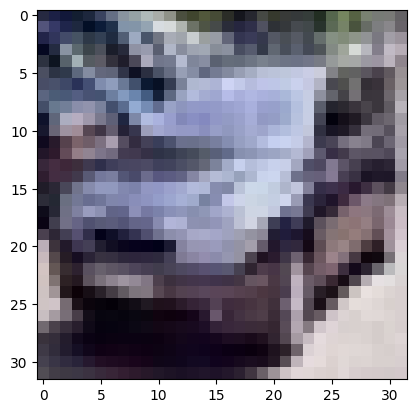

In [ ]:
# label mapping

labels = '''airplane automobile bird cat deer dog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 290

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))